In [164]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import datetime as dt
from random import seed
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend as K
tf.compat.v1.experimental.output_all_intermediates(True)
import shap
from sklearn.preprocessing import OneHotEncoder


In [165]:
import sys
print(sys.executable)

C:\Users\jerem\AppData\Local\Programs\Python\Python310\python.exe


In [166]:
seed(36)

In [167]:
df = pd.read_csv("2016_2017_sto_nino_and_montalban.csv")
df.head(10)

,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,0,2016-01-01 00:00:00,1,1,0,0.0,Montalban,0,0,1,2,0,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
1,1,2016-01-01 00:00:00,1,1,0,0.0,Sto_Nino,14420,0,1,2,0,0,12.18,21.033407,803.88,0.026165,0.033,0.000667
2,2,2016-01-01 01:00:00,1,1,1,3600.0,Montalban,0,0,1,1,1,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
3,3,2016-01-01 01:00:00,1,1,1,3600.0,Sto_Nino,14420,0,1,1,1,0,12.19,21.280072,804.54,0.026450,0.033,0.000667
4,4,2016-01-01 02:00:00,1,1,2,7200.0,Montalban,0,1,1,1,0,1,21.03,14.842428,630.90,0.023526,0.035,0.002000
5,5,2016-01-01 02:00:00,1,1,2,7200.0,Sto_Nino,14420,1,1,1,0,1,12.19,21.280072,804.54,0.026450,0.033,0.000667
6,6,2016-01-01 03:00:00,1,1,3,10800.0,Montalban,0,0,0,0,1,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
7,7,2016-01-01 03:00:00,1,1,3,10800.0,Sto_Nino,14420,0,0,0,1,0,12.20,21.529056,805.20,0.026738,0.033,0.000667
8,8,2016-01-01 04:00:00,1,1,4,14400.0,Montalban,0,1,1,1,0,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
9,9,2016-01-01 04:00:00,1,1,4,14400.0,Sto_Nino,14420,1,1,1,0,0,12.20,21.529056,805.20,0.026738,0.033,0.000667


In [170]:
# Binary Encode the Station
df_encoded = df.copy()
df_encoded['Station'] = df['Station'].map({'Sto_Nino': 1, 'Montalban': 0})

'''
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['Station']])
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(['Station'])
)

df_encoded = pd.concat([df.drop('Station', axis=1), encoded_df], axis=1)
'''

"\nencoder = OneHotEncoder(sparse_output=False)\nencoded_data = encoder.fit_transform(df[['Station']])\nencoded_df = pd.DataFrame(\n    encoded_data,\n    columns=encoder.get_feature_names_out(['Station'])\n)\n\ndf_encoded = pd.concat([df.drop('Station', axis=1), encoded_df], axis=1)\n"

In [172]:
df_encoded

,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,0,2016-01-01 00:00:00,1,1,0,0.0,0,0,0,1,2,0,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
1,1,2016-01-01 00:00:00,1,1,0,0.0,1,14420,0,1,2,0,0,12.18,21.033407,803.88,0.026165,0.033,0.000667
2,2,2016-01-01 01:00:00,1,1,1,3600.0,0,0,0,1,1,1,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
3,3,2016-01-01 01:00:00,1,1,1,3600.0,1,14420,0,1,1,1,0,12.19,21.280072,804.54,0.026450,0.033,0.000667
4,4,2016-01-01 02:00:00,1,1,2,7200.0,0,0,1,1,1,0,1,21.03,14.842428,630.90,0.023526,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,2017-12-31 21:00:00,12,31,21,63147600.0,1,14420,0,0,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667
35036,35036,2017-12-31 22:00:00,12,31,22,63151200.0,0,0,0,0,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000
35037,35037,2017-12-31 22:00:00,12,31,22,63151200.0,1,14420,0,0,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667
35038,35038,2017-12-31 23:00:00,12,31,23,63154800.0,0,0,0,0,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000


In [173]:
n = len(df)

In [174]:
test = df[int(n*0.75):]
test_dates = test['datetime']
test_dates

26280    2017-07-02 12:00:00
26281    2017-07-02 12:00:00
26282    2017-07-02 13:00:00
26283    2017-07-02 13:00:00
26284    2017-07-02 14:00:00
                ...         
35035    2017-12-31 21:00:00
35036    2017-12-31 22:00:00
35037    2017-12-31 22:00:00
35038    2017-12-31 23:00:00
35039    2017-12-31 23:00:00
Name: datetime, Length: 8760, dtype: object

In [175]:
test_dates = pd.to_datetime(test_dates)


In [177]:
montalban_df = df_encoded[df_encoded["Station"] == 0]
stonino_df = df_encoded[df_encoded["Station"] == 1]

In [178]:
montalban_df

,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,0,2016-01-01 00:00:00,1,1,0,0.0,0,0,0,1,2,0,0,21.03,14.842428,630.9,0.023526,0.035,0.002
2,2,2016-01-01 01:00:00,1,1,1,3600.0,0,0,0,1,1,1,0,21.03,14.842428,630.9,0.023526,0.035,0.002
4,4,2016-01-01 02:00:00,1,1,2,7200.0,0,0,1,1,1,0,1,21.03,14.842428,630.9,0.023526,0.035,0.002
6,6,2016-01-01 03:00:00,1,1,3,10800.0,0,0,0,0,0,1,0,21.03,14.842428,630.9,0.023526,0.035,0.002
8,8,2016-01-01 04:00:00,1,1,4,14400.0,0,0,1,1,1,0,0,21.03,14.842428,630.9,0.023526,0.035,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35030,35030,2017-12-31 19:00:00,12,31,19,63140400.0,0,0,0,0,0,0,0,21.18,17.224575,635.4,0.027108,0.035,0.002
35032,35032,2017-12-31 20:00:00,12,31,20,63144000.0,0,0,0,0,0,0,0,21.18,17.224575,635.4,0.027108,0.035,0.002
35034,35034,2017-12-31 21:00:00,12,31,21,63147600.0,0,0,0,0,0,0,0,21.18,17.224575,635.4,0.027108,0.035,0.002
35036,35036,2017-12-31 22:00:00,12,31,22,63151200.0,0,0,0,0,0,0,0,21.18,17.224575,635.4,0.027108,0.035,0.002


In [186]:
montalban_df_1 = montalban_df[['month', 'day', 'hour', 'Station', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro', 'Waterlevel']]
sto_nino_df_1 = stonino_df[['month', 'day', 'hour', 'Station', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro', 'Waterlevel']]

In [187]:
sto_nino_df_1 = sto_nino_df_1.drop(columns='Station')
montalban_df_1 = montalban_df_1.drop(columns = 'Station')


In [188]:
montalban_df_1

,month,day,hour,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel
0,1,1,0,0,1,2,0,0,21.03
2,1,1,1,0,1,1,1,0,21.03
4,1,1,2,1,1,1,0,1,21.03
6,1,1,3,0,0,0,1,0,21.03
8,1,1,4,1,1,1,0,0,21.03
...,...,...,...,...,...,...,...,...,...
35030,12,31,19,0,0,0,0,0,21.18
35032,12,31,20,0,0,0,0,0,21.18
35034,12,31,21,0,0,0,0,0,21.18
35036,12,31,22,0,0,0,0,0,21.18


## Sto. Nino Model

In [189]:
# Splitting for time series: split into 50-25-25
n = len(sto_nino_df_1)
train_df_sto_nino = sto_nino_df_1[0:int(n*0.5)]
val_df_sto_nino = sto_nino_df_1[int(n*0.5):int(n*0.75)]
test_df_sto_nino = sto_nino_df_1[int(n*0.75):]

In [190]:
n = len(montalban_df_1)
train_df_montalban = montalban_df_1[0:int(n*0.5)]
val_df_montalban = montalban_df_1[int(n*0.5):int(n*0.75)]
test_df_montalban = montalban_df_1[int(n*0.75):]

In [191]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df, val_df, test_df, label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    # Creating tf datasets for more convenient use and integration into model in the future
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    # properties to access them as tf datasets
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

In [194]:
CONSECUTIVE_HOURS = 1
window_sto_nino = WindowGenerator(
        input_width=CONSECUTIVE_HOURS, label_width=1, shift=1,
        train_df=train_df_sto_nino, 
        val_df=val_df_sto_nino,
        test_df=test_df_sto_nino,
        label_columns=['Waterlevel']
    )

window_sto_nino

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Waterlevel']

In [195]:
window_montalban = WindowGenerator(
        input_width=CONSECUTIVE_HOURS, label_width=1, shift=1,
        train_df=train_df_montalban, 
        val_df=val_df_montalban,
        test_df=test_df_montalban,
        label_columns=['Waterlevel']
    )

window_montalban

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Waterlevel']

In [196]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r

In [197]:
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [198]:
# For easy compiling and fitting of different models
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(), 
        optimizer='adam', 
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )

    history = model.fit(
        window.train, 
        epochs=MAX_EPOCHS,
        validation_data=window.val,
        callbacks=[early_stopping]
    )

    return history

In [199]:
# LSTM
lstm_model_sto_nino = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

lstm_model_montalban = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [200]:
lstm_history_sto_nino = compile_and_fit(lstm_model_sto_nino, window_sto_nino)

Epoch 1/20
274/274 [==============================] - 11s 16ms/step - loss: 10.1026 - mean_squared_error: 10.1026 - NSE: -25.1110 - r_square: 0.3015 - val_loss: 0.2210 - val_mean_squared_error: 0.2210 - val_NSE: -2.3750 - val_r_square: 0.1648
Epoch 2/20
274/274 [==============================] - 3s 10ms/step - loss: 0.2218 - mean_squared_error: 0.2218 - NSE: 0.4795 - r_square: 0.5508 - val_loss: 0.2203 - val_mean_squared_error: 0.2203 - val_NSE: -2.5654 - val_r_square: 0.1378
Epoch 3/20
274/274 [==============================] - 2s 9ms/step - loss: 0.1780 - mean_squared_error: 0.1780 - NSE: 0.5842 - r_square: 0.6452 - val_loss: 0.1441 - val_mean_squared_error: 0.1441 - val_NSE: -1.3222 - val_r_square: 0.0757
Epoch 4/20
274/274 [==============================] - 3s 12ms/step - loss: 0.1364 - mean_squared_error: 0.1364 - NSE: 0.6818 - r_square: 0.7386 - val_loss: 0.1089 - val_mean_squared_error: 0.1089 - val_NSE: -0.6601 - val_r_square: 0.0389
Epoch 5/20
274/274 [========================

In [201]:
lstm_history_montalban = compile_and_fit(lstm_model_montalban, window_montalban)

Epoch 1/20
274/274 [==============================] - 10s 14ms/step - loss: 53.2151 - mean_squared_error: 53.2151 - NSE: -147.5399 - r_square: 0.2605 - val_loss: 0.2727 - val_mean_squared_error: 0.2727 - val_NSE: -29.3462 - val_r_square: 0.0992
Epoch 2/20
274/274 [==============================] - 3s 13ms/step - loss: 0.3133 - mean_squared_error: 0.3133 - NSE: 0.3720 - r_square: 0.4712 - val_loss: 0.1912 - val_mean_squared_error: 0.1912 - val_NSE: -20.4048 - val_r_square: 0.0794
Epoch 3/20
274/274 [==============================] - 4s 14ms/step - loss: 0.2777 - mean_squared_error: 0.2777 - NSE: 0.4708 - r_square: 0.5382 - val_loss: 0.1706 - val_mean_squared_error: 0.1706 - val_NSE: -18.4254 - val_r_square: 0.0686
Epoch 4/20
274/274 [==============================] - 4s 14ms/step - loss: 0.2624 - mean_squared_error: 0.2624 - NSE: 0.5007 - r_square: 0.5691 - val_loss: 0.1326 - val_mean_squared_error: 0.1326 - val_NSE: -13.0030 - val_r_square: 0.0471
Epoch 5/20
274/274 [==================

## SHAP Feature Selection (Sto. Nino)

1/1 [==============================] - 1s 1s/step


  0%|          | 0/10 [00:00<?, ?it/s]

510/510 [==============================] - 1s 3ms/step


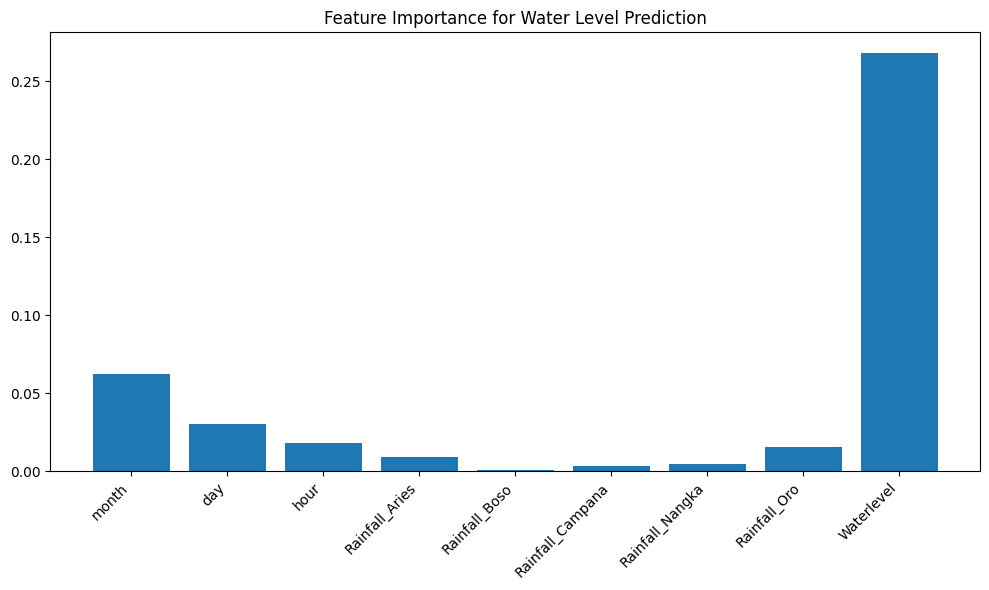

In [202]:
import shap
import numpy as np

# Extract a batch of test data
test_data = []
for inputs, _ in window_sto_nino.test.take(1):
    test_data = inputs.numpy()
    break

# Create a flattened version for the explainer
test_data_flat = test_data.reshape(test_data.shape[0], -1)  # Flatten time steps and features

# Create a prediction function that returns a single value (e.g., last time step of water level)
def predict_last_step(X):
    # Reshape back to 3D
    batch_size = X.shape[0]
    time_steps = window_sto_nino.input_width
    features = len(window_sto_nino.train_df.columns)
    
    X_reshaped = X.reshape(batch_size, time_steps, features)
    
    # Get model predictions
    preds = lstm_model_sto_nino.predict(X_reshaped)
    
    # Return the last time step prediction for water level
    return preds[:, -1, 0]  # Last time step, first feature (water level)

# Select a smaller subset for background data
background_data_flat = test_data_flat[:50]  # Using 50 samples as background

# Create the explainer
explainer = shap.KernelExplainer(predict_last_step, background_data_flat)

# Calculate SHAP values for a few test samples
shap_values = explainer.shap_values(test_data_flat[:10])  # Explain 10 samples

# Reshape the SHAP values back to the original input format
shap_values_reshaped = shap_values.reshape(10, window_sto_nino.input_width, -1)

# Create a feature importance plot
feature_names = list(window_sto_nino.train_df.columns)
shap_importance = np.abs(shap_values).mean(axis=0)
feature_importance = []

# Reshape the importance values to match features
for i in range(len(feature_names)):
    start_idx = i
    end_idx = len(feature_names) * window_sto_nino.input_width
    step = len(feature_names)
    feature_importance.append(np.mean(shap_importance[start_idx:end_idx:step]))

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Feature Importance for Water Level Prediction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [203]:
shap_importance

array([0.06262439, 0.03008261, 0.01802086, 0.00915686, 0.00102359,
       0.00341674, 0.00445924, 0.01575605, 0.26791567])

In [204]:
feature_importance

[0.06262438958702929,
 0.030082613172837454,
 0.01802086159335601,
 0.009156863516906203,
 0.0010235935260379393,
 0.0034167397366689353,
 0.004459238880358289,
 0.01575604877434667,
 0.2679156747056791]

In [208]:
def get_predictions(model, test_set):
    y_pred = []
    
    for x, _ in test_set:
        predictions = model(x)
        for y in predictions:
            y_pred.append(y)
    
    y_pred = np.array(y_pred)
    y_pred = y_pred.reshape(-1)
    
    return y_pred

In [209]:
get_predictions(lstm_model_sto_nino, window_sto_nino.test)

array([12.491232 , 12.547262 , 12.534919 , 12.660923 , 13.193272 ,
       13.299902 , 12.949921 , 12.634495 , 13.074671 , 12.80589  ,
       12.512852 , 12.414392 , 12.193961 , 12.401674 , 12.563549 ,
       12.817974 , 12.565569 , 12.305116 , 12.494839 , 12.317523 ,
       12.268452 , 12.1997795, 11.878795 , 12.31681  , 12.412061 ,
       13.709983 , 12.533632 , 12.498835 , 12.613361 , 13.034751 ,
       12.39824  , 12.361452 , 12.530285 , 13.71386  , 12.327542 ,
       15.053476 , 12.372179 , 12.310522 , 12.562267 , 13.552078 ,
       12.6686325, 12.683022 , 12.368382 , 12.653684 , 12.858551 ,
       12.472687 , 11.959226 , 12.490594 , 13.191311 , 12.966037 ,
       14.086203 , 12.121887 , 12.731143 , 12.280141 , 12.720918 ,
       11.9738655, 12.696093 , 13.337548 , 13.506126 , 11.887008 ,
       12.893953 , 11.997282 , 12.425217 , 12.442434 , 12.44628  ,
       13.037307 , 12.623925 , 12.02256  , 12.721532 , 12.502869 ,
       12.502953 , 12.468093 , 12.732422 , 12.568542 , 13.0086

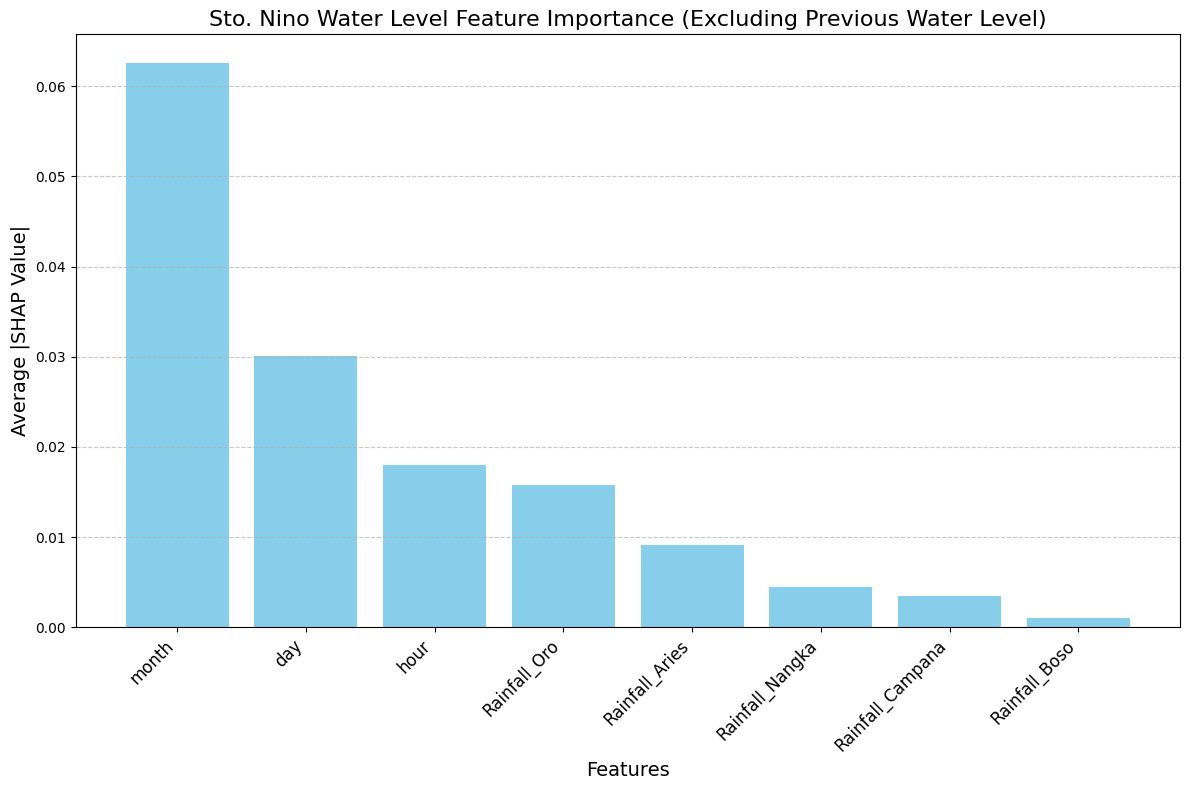

In [210]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'shap_values' contains your calculated SHAP values
# and 'feature_names' contains your feature names

# Get the index of the 'Waterlevel' feature to exclude it
waterlevel_index = feature_names.index('Waterlevel')

# Create a mask to filter out the Waterlevel feature
mask = np.ones(len(feature_names), dtype=bool)
mask[waterlevel_index] = False

# Filter feature names and importance values
filtered_feature_names = [feature_names[i] for i in range(len(feature_names)) if i != waterlevel_index]

# For the flat KernelExplainer approach:
filtered_feature_importance = []
for i in range(len(feature_names)):
    if i != waterlevel_index:
        start_idx = i
        end_idx = len(feature_names) * window_sto_nino.input_width
        step = len(feature_names)
        filtered_feature_importance.append(np.mean(shap_importance[start_idx:end_idx:step]))

# Sort features by importance
sorted_indices = np.argsort(filtered_feature_importance)[::-1]  # Descending order
sorted_feature_names = [filtered_feature_names[i] for i in sorted_indices]
sorted_importance = [filtered_feature_importance[i] for i in sorted_indices]

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_feature_names, sorted_importance, color='skyblue')
plt.title('Sto. Nino Water Level Feature Importance (Excluding Previous Water Level)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Average |SHAP Value|', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()


# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



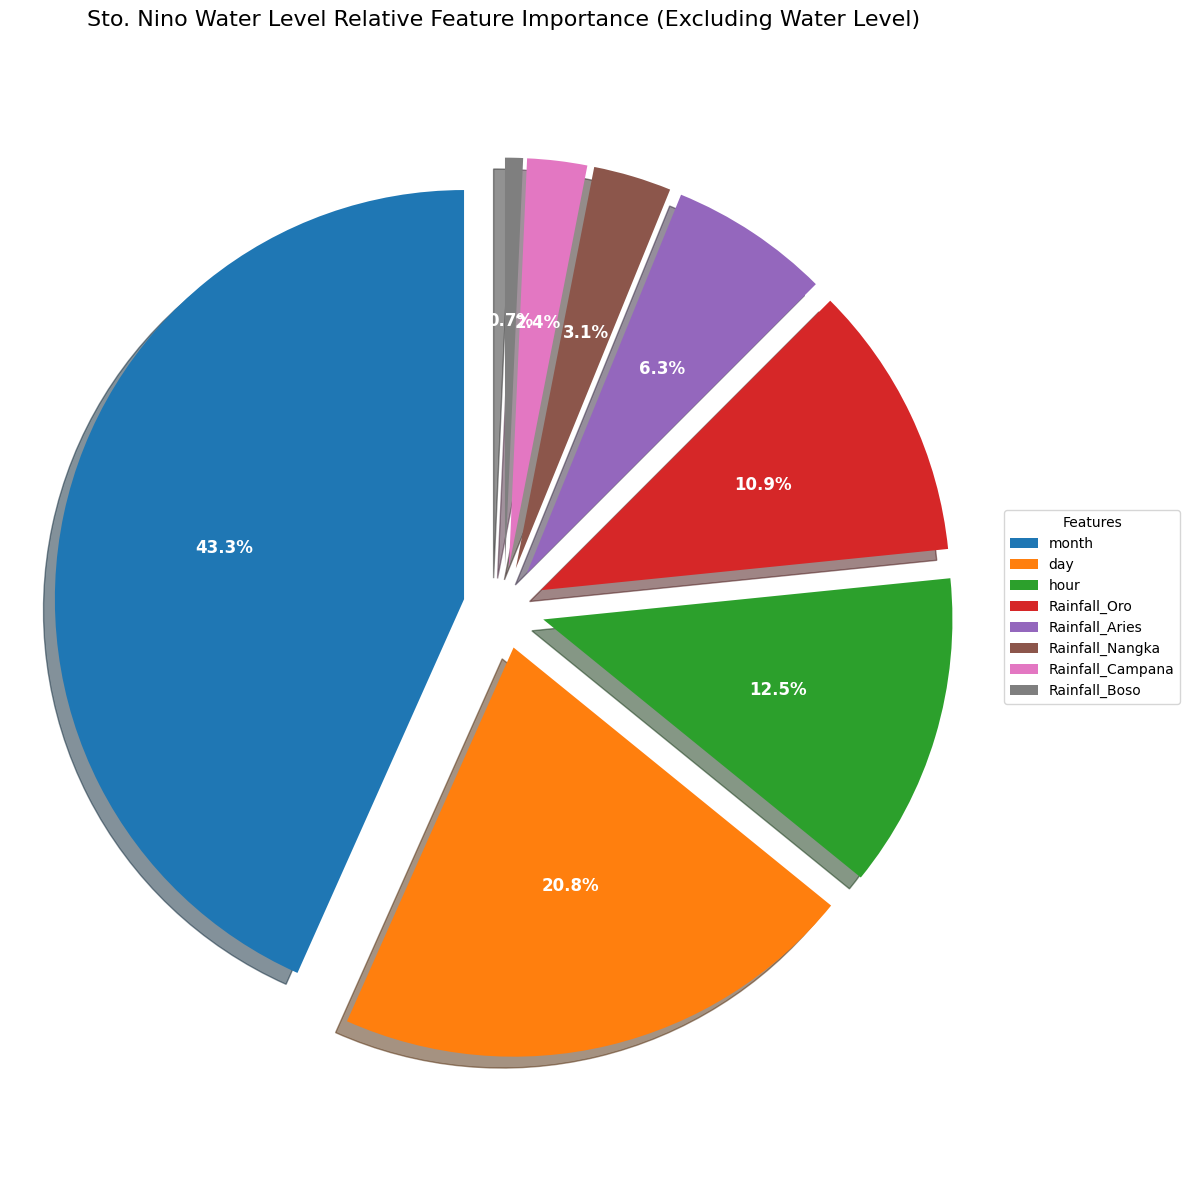

In [211]:
# Create a pie chart with improved label placement
plt.figure(figsize=(12, 12))  # Slightly larger figure

# Create pie with smaller wedges to make room for labels
wedges, texts, autotexts = plt.pie(
    sorted_importance, 
    labels=None,  # Remove default labels
    autopct='%1.1f%%',
    startangle=90, 
    shadow=True, 
    explode=[0.1]*len(sorted_importance),  # Increase explosion to separate wedges more
    textprops={'fontsize': 12}
)

# Enhance the appearance of percentage labels inside the pie
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add legend outside the pie chart instead of direct labels
plt.legend(
    wedges, 
    sorted_feature_names,
    title="Features",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)  # Position legend to the right of the pie
)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Sto. Nino Water Level Relative Feature Importance (Excluding Water Level)', fontsize=16)
plt.tight_layout()
plt.show()

In [212]:
sorted_feature_names

['month',
 'day',
 'hour',
 'Rainfall_Oro',
 'Rainfall_Aries',
 'Rainfall_Nangka',
 'Rainfall_Campana',
 'Rainfall_Boso']

In [213]:
sorted_importance

[0.06262438958702929,
 0.030082613172837454,
 0.01802086159335601,
 0.01575604877434667,
 0.009156863516906203,
 0.004459238880358289,
 0.0034167397366689353,
 0.0010235935260379393]

## SHAP Feature Selection (Montalban)

1/1 [==============================] - 1s 1s/step


  0%|          | 0/10 [00:00<?, ?it/s]

254/254 [==============================] - 1s 3ms/step


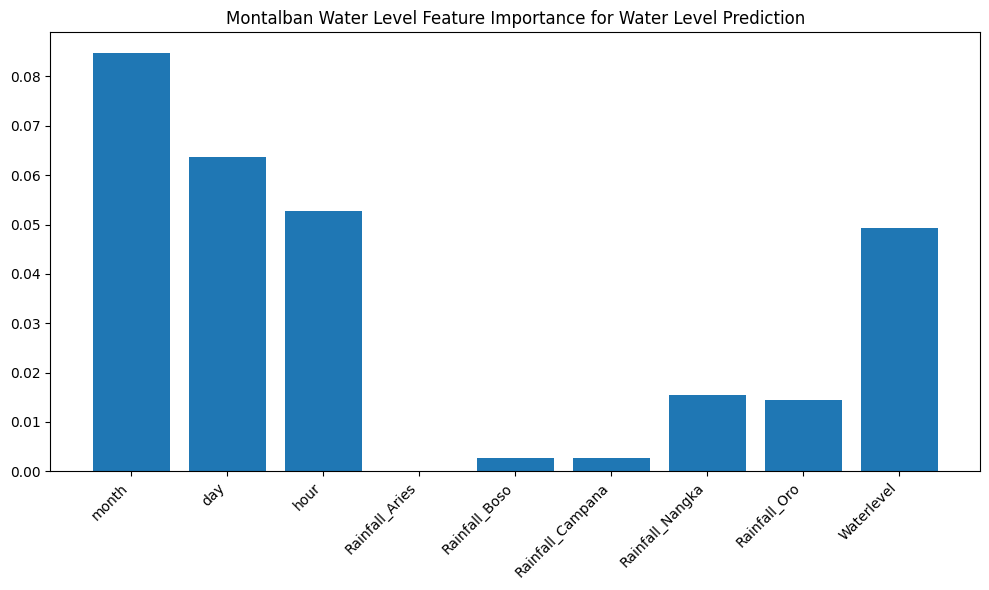

In [214]:
import shap
import numpy as np

# Extract a batch of test data
test_data = []
for inputs, _ in window_montalban.test.take(1):
    test_data = inputs.numpy()
    break

# Create a flattened version for the explainer
test_data_flat = test_data.reshape(test_data.shape[0], -1)  # Flatten time steps and features

# Create a prediction function that returns a single value (e.g., last time step of water level)
def predict_last_step(X):
    # Reshape back to 3D
    batch_size = X.shape[0]
    time_steps = window_montalban.input_width
    features = len(window_montalban.train_df.columns)
    
    X_reshaped = X.reshape(batch_size, time_steps, features)
    
    # Get model predictions
    preds = lstm_model_montalban.predict(X_reshaped)
    
    # Return the last time step prediction for water level
    return preds[:, -1, 0]  # Last time step, first feature (water level)

# Select a smaller subset for background data
background_data_flat = test_data_flat[:50]  # Using 50 samples as background

# Create the explainer
explainer = shap.KernelExplainer(predict_last_step, background_data_flat)

# Calculate SHAP values for a few test samples
shap_values = explainer.shap_values(test_data_flat[:10])  # Explain 10 samples

# Reshape the SHAP values back to the original input format
shap_values_reshaped = shap_values.reshape(10, window_montalban.input_width, -1)

# Create a feature importance plot
feature_names = list(window_montalban.train_df.columns)
shap_importance = np.abs(shap_values).mean(axis=0)
feature_importance = []

# Reshape the importance values to match features
for i in range(len(feature_names)):
    start_idx = i
    end_idx = len(feature_names) * window_montalban.input_width
    step = len(feature_names)
    feature_importance.append(np.mean(shap_importance[start_idx:end_idx:step]))

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Montalban Water Level Feature Importance for Water Level Prediction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [215]:
shap_importance

array([0.08469345, 0.06376547, 0.05282599, 0.        , 0.00267068,
       0.00279235, 0.01552898, 0.01440235, 0.04929258])

In [216]:
feature_importance

[0.08469345122575758,
 0.06376547485589976,
 0.05282599290211991,
 0.0,
 0.0026706809798876406,
 0.0027923504511515184,
 0.015528978506724047,
 0.014402345915635426,
 0.04929258147875463]

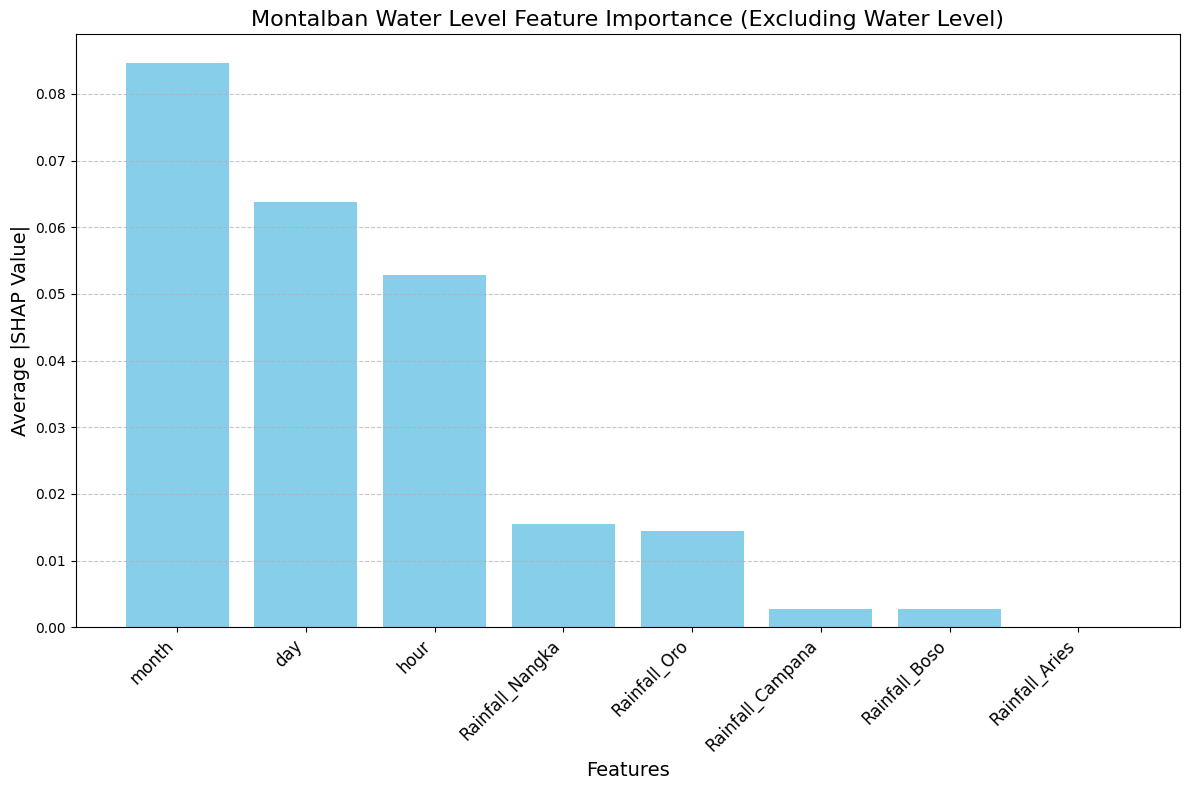

In [217]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'shap_values' contains your calculated SHAP values
# and 'feature_names' contains your feature names

# Get the index of the 'Waterlevel' feature to exclude it
waterlevel_index = feature_names.index('Waterlevel')

# Create a mask to filter out the Waterlevel feature
mask = np.ones(len(feature_names), dtype=bool)
mask[waterlevel_index] = False

# Filter feature names and importance values
filtered_feature_names = [feature_names[i] for i in range(len(feature_names)) if i != waterlevel_index]

# For the flat KernelExplainer approach:
filtered_feature_importance = []
for i in range(len(feature_names)):
    if i != waterlevel_index:
        start_idx = i
        end_idx = len(feature_names) * window_montalban.input_width
        step = len(feature_names)
        filtered_feature_importance.append(np.mean(shap_importance[start_idx:end_idx:step]))

# Sort features by importance
sorted_indices = np.argsort(filtered_feature_importance)[::-1]  # Descending order
sorted_feature_names = [filtered_feature_names[i] for i in sorted_indices]
sorted_importance = [filtered_feature_importance[i] for i in sorted_indices]

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_feature_names, sorted_importance, color='skyblue')
plt.title('Montalban Water Level Feature Importance (Excluding Water Level)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Average |SHAP Value|', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()


# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



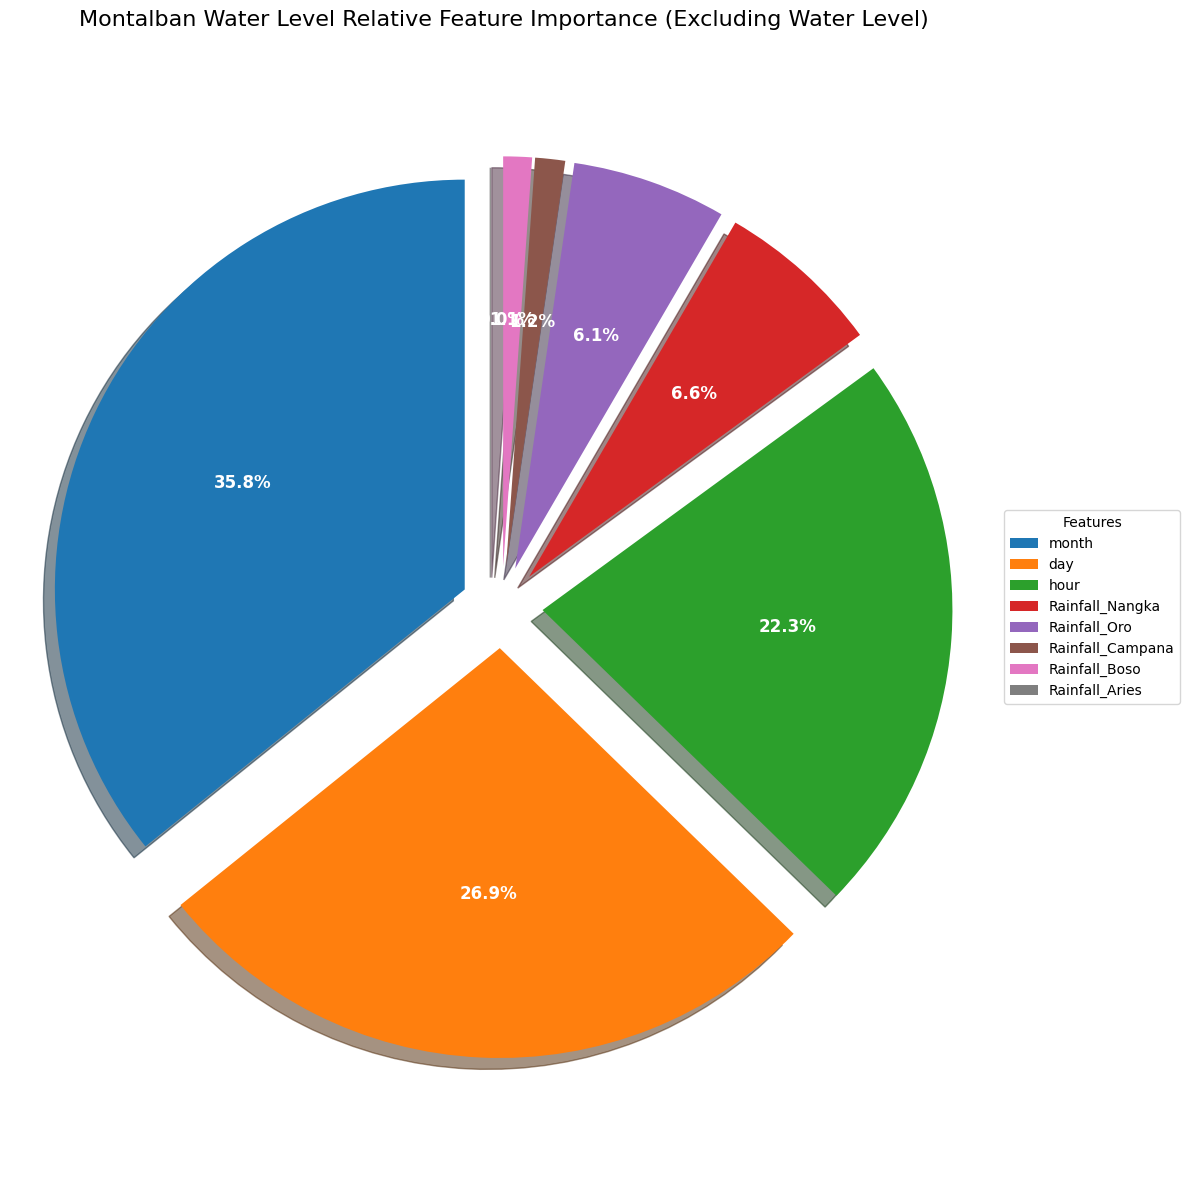

In [218]:
# Create a pie chart with improved label placement
plt.figure(figsize=(12, 12))  # Slightly larger figure

# Create pie with smaller wedges to make room for labels
wedges, texts, autotexts = plt.pie(
    sorted_importance, 
    labels=None,  # Remove default labels
    autopct='%1.1f%%',
    startangle=90, 
    shadow=True, 
    explode=[0.1]*len(sorted_importance),  # Increase explosion to separate wedges more
    textprops={'fontsize': 12}
)

# Enhance the appearance of percentage labels inside the pie
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add legend outside the pie chart instead of direct labels
plt.legend(
    wedges, 
    sorted_feature_names,
    title="Features",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)  # Position legend to the right of the pie
)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Montalban Water Level Relative Feature Importance (Excluding Water Level)', fontsize=16)
plt.tight_layout()
plt.show()